# Problem Statement : What distinguishes Oscar-winning movies from others? Can we profile common characteristics using clustering and feature analysis?

# 1. Problem Statement

What traits set Oscar-winning movies apart from others?
We aim to identify meaningful clusters of films and explore the characteristics that commonly define Oscar-winning ones.

# 2. Data Sources

IMDb Movie Metadata (Swathi.csv)

Oscar Awards & Categories (Cleaned_Felix.csv)

# 3. Methodology

Preprocess numeric and categorical features

Use OneHotEncoding + StandardScaler

Apply KMeans clustering

Visualize using PCA (2D)

Compare clusters by oscar_winner ratio

# 4. Key Metrics & Tools

Features: IMDb Rating, Runtime, Genres, Year, Num Votes

Models: KMeans, PCA

Tools: Python, Pandas, Scikit-Learn, Seaborn, Matplotlib

# 5. Expected Insights

Clusters with high Oscar-winning density

Common profile: e.g., Drama/Romance, higher IMDb, longer runtime

Possibly surprising patterns: e.g., some genres rarely win

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
felix_df = pd.read_csv("../data/Cleaned_Felix.csv")
swathi_df = pd.read_csv("../data/Swathi.csv")


In [7]:
# Normalize and merge
felix_df['film'] = felix_df['film'].str.lower().str.strip()
swathi_df['Title'] = swathi_df['Title'].str.lower().str.strip()
merged_df = pd.merge(swathi_df, felix_df[['film', 'status']], left_on='Title', right_on='film', how='left')
merged_df['oscar_winner'] = merged_df['status'].fillna('Not Won').apply(lambda x: 1 if x == 'Won' else 0)
merged_df.drop(columns=['film', 'status'], inplace=True)

In [9]:
# Select features
features = ['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Genres', 'Title Type']
data = merged_df[features + ['oscar_winner']].dropna()

In [15]:
# Preprocessing
numeric_features = ['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']
categorical_features = ['Genres', 'Title Type']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X = data[features]
X_preprocessed = preprocessor.fit_transform(X)

In [17]:
# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)
data['cluster'] = clusters


In [19]:
# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

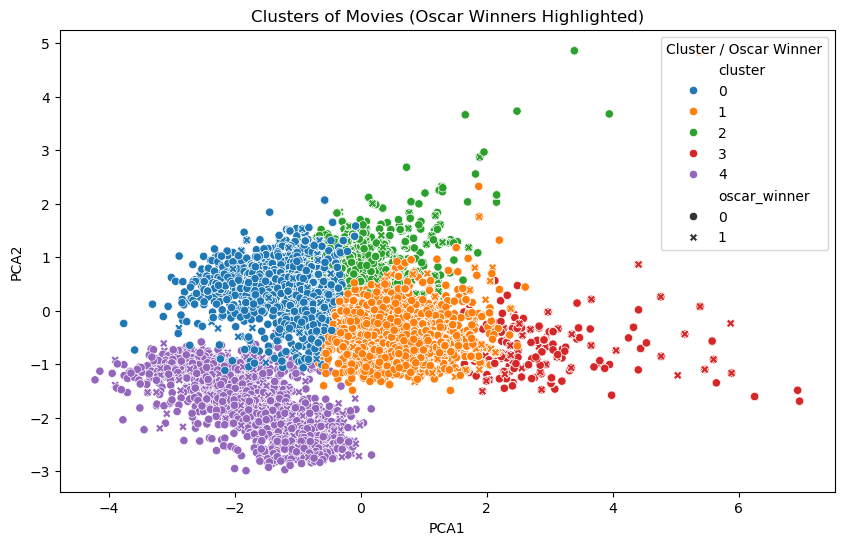

In [21]:
# Plot clusters with Oscar winners highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='cluster', style='oscar_winner', palette='tab10')
plt.title('Clusters of Movies (Oscar Winners Highlighted)')
plt.legend(title='Cluster / Oscar Winner')
plt.show()

In [23]:
# Analyze cluster composition
cluster_summary = data.groupby('cluster')['oscar_winner'].agg(['count', 'sum', 'mean'])
print("\nOscar Winner Distribution by Cluster:\n")
print(cluster_summary.sort_values(by='mean', ascending=False))


Oscar Winner Distribution by Cluster:

         count  sum      mean
cluster                      
3          772  273  0.353627
2         3197  742  0.232093
4         1284  266  0.207165
1         3331  610  0.183128
0         2260  297  0.131416
